# Visualization of NYC Yellow Taxi Trip Summary (Jan 2023)

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Setup
sns.set(style="whitegrid")
PROJECT_ROOT = Path("..")
SUMMARY_PATH = PROJECT_ROOT / "data" / "processed" / "trip_summary_hourly.csv"

# Read csv and parse pickup_hour as datetime
df = pd.read_csv(SUMMARY_PATH, parse_dates=["pickup_hour"]) 
df.head()

,pickup_hour,trip_count,avg_distance,avg_total_amount,avg_duration_min
0,2023-01-01 00:00:00,5217,3.388792,27.435576,18.045454
1,2023-01-01 01:00:00,5561,3.345114,27.218675,17.673581
2,2023-01-01 02:00:00,4944,3.441210,26.793956,17.534884
3,2023-01-01 03:00:00,3804,3.606159,27.200815,16.449330
4,2023-01-01 04:00:00,2381,3.977761,28.495120,15.952233


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pickup_hour       744 non-null    datetime64[ns]
 1   trip_count        744 non-null    int64         
 2   avg_distance      744 non-null    float64       
 3   avg_total_amount  744 non-null    float64       
 4   avg_duration_min  744 non-null    float64       
 5   hour_of_day       744 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1)
memory usage: 32.1 KB


In [26]:
df.describe()

,pickup_hour,trip_count,avg_distance,avg_total_amount,avg_duration_min,hour_of_day
count,744,744.000000,744.000000,744.000000,744.000000,744.000000
mean,2023-01-16 11:29:59.999999744,4030.376344,4.768508,28.803298,15.543763,11.500000
min,2023-01-01 00:00:00,143.000000,2.207193,22.308634,10.299303,0.000000
25%,2023-01-08 17:45:00,1773.750000,3.113303,25.812823,14.257959,5.750000
50%,2023-01-16 11:30:00,4663.500000,3.534635,27.455121,15.383891,11.500000
75%,2023-01-24 05:15:00,5848.750000,4.649930,30.258573,16.734352,17.250000
max,2023-01-31 23:00:00,9323.000000,197.728073,47.907713,26.763441,23.000000
std,NaN,2291.609427,8.714603,4.470415,2.053188,6.926843


### Hourly Trip Volume

This chart shows the number of taxi trips per hour across January 2023. Regular daily peaks and lows can reflect commute patterns, nightlife activity, or weekend behavior.

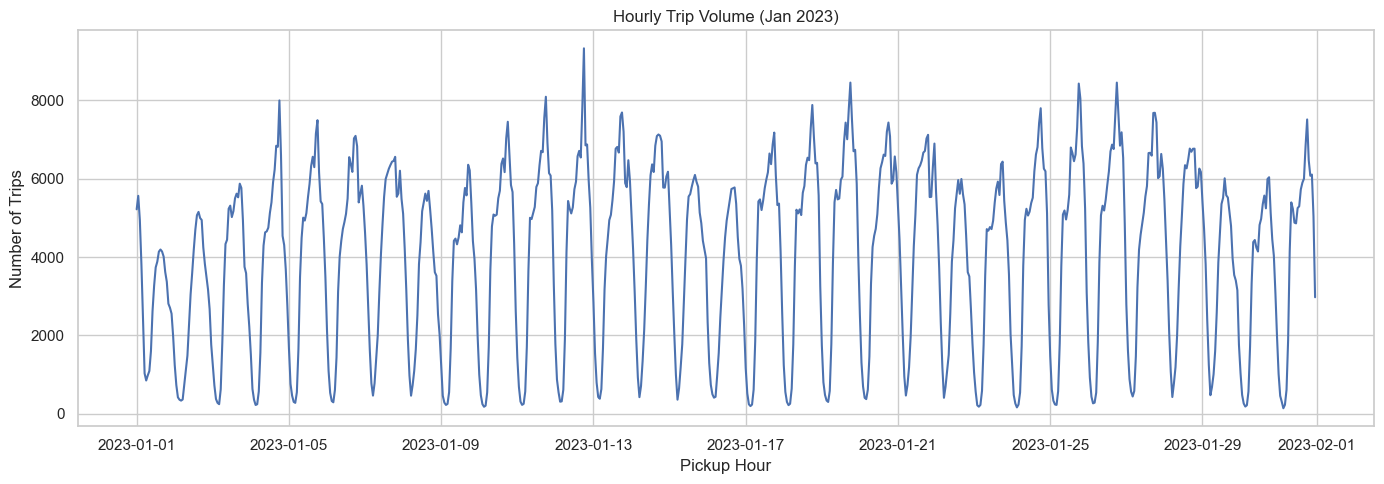

In [6]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x="pickup_hour", y="trip_count")

plt.title("Hourly Trip Volume (Jan 2023)")
plt.xlabel("Pickup Hour")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.grid(True)
plt.show()

There is a regular daily pattern in trip volume, with visible peaks and low points repeating across the month. These fluctuations likely reflect typical weekday and weekend travel behavior.


### Average Fare Over Time

This chart displays the average total fare amount per trip, measured hourly. It helps identify pricing fluctuations, potential surcharges during peak times, or fare dips during off-hour.


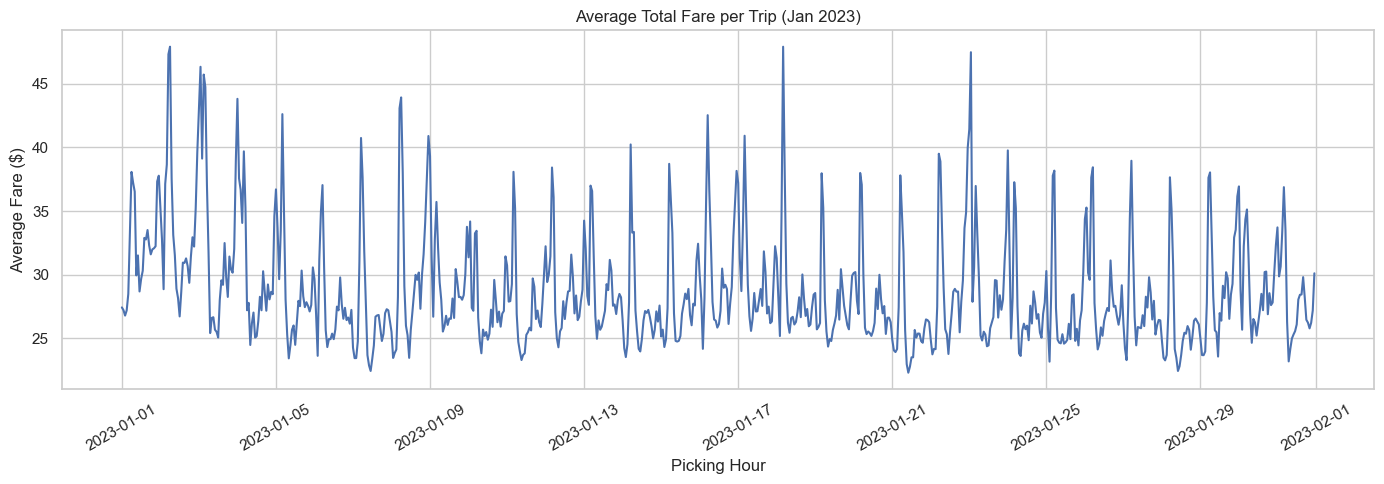

In [10]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x="pickup_hour", y="avg_total_amount")

plt.title("Hourly Average Fare Amount (Time Series, Jan 2023)")
plt.xlabel("Time")
plt.ylabel("Average Fare ($)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(True)
plt.show()

Average fare amounts vary throughout the month, with some noticeable spikes. These may be due to longer trips, occasional surcharges, or changes in trip distribution at certain hours.


While this chart shows how the average fare fluctuates throughout the month, it doesn’t isolate hourly behavior across days. In the next chart, we’ll group by hour of day to better understand which time windows are generally more expensive.


### Average Fare by Hour of Day

This plot shows the average fare amount grouped by the hour of day, across the entire month. It helps highlight whether certain time windows—like early mornings or late nights—tend to have higher fares on average.

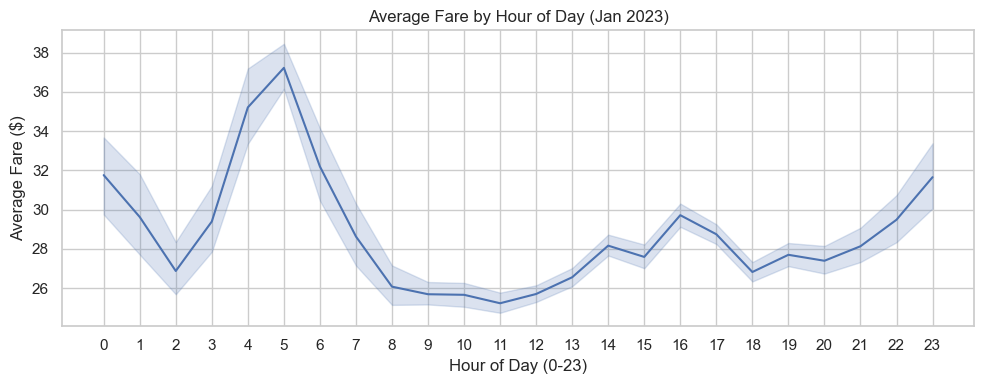

In [14]:
# Extract hour of day
df["hour_of_day"] = df["pickup_hour"].dt.hour

# Plot average fare by hour of day
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x="hour_of_day", y="avg_total_amount")

plt.title("Average Fare by Hour of Day (Jan 2023)")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Average Fare ($)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

Fares tend to be higher during late-night hours, particularly between 1am and 4am. This could reflect night-time pricing policies or longer average trip distances during those hours.


### Average Trip Duration Over Time

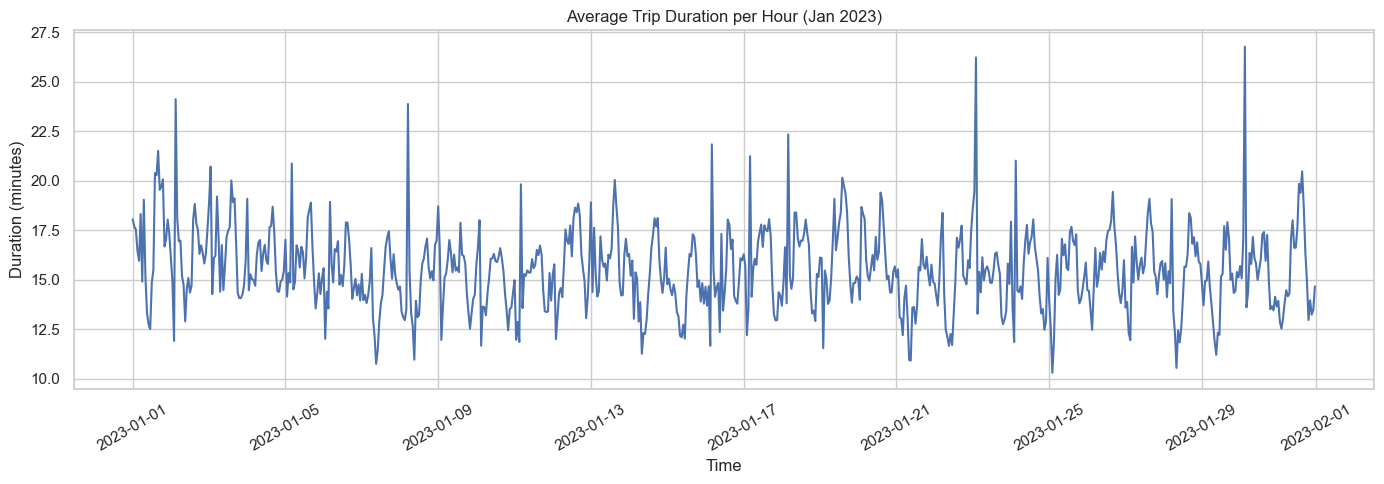

In [18]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x="pickup_hour", y="avg_duration_min")

plt.title("Average Trip Duration per Hour (Jan 2023)")
plt.xlabel("Time")
plt.ylabel("Duration (minutes)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(True)
plt.show()

Trip duration is mostly stable but with a few higher points. These may correspond to isolated long trips or temporary slowdowns such as traffic or weather-related delays.


### Average Trip Duration by Hour of Day

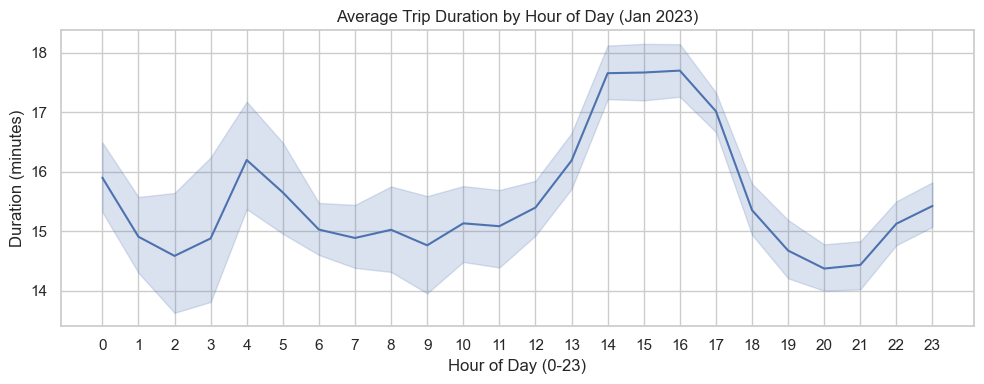

In [21]:
# Group by hour of day (already exists from earlier step)
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x="hour_of_day", y="avg_duration_min")

plt.title("Average Trip Duration by Hour of Day (Jan 2023)")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Duration (minutes)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

Longer trip durations are more common during the early morning hours. This may be related to traffic conditions, trip length, or rider patterns during those times.


### Summary

This notebook visualized hourly trends in trip count, fare amount, and trip duration. The patterns observed here can be useful for identifying when and how travel behavior varies across time. These insights will help shape the design of later dashboards or reporting tools.